Проверка, пример использования функций сепарации, и сравнение с результатами UniflocVBA 7.4

При импорте модуля автоматический запускается тест на наличие ошибок

(В дальнейшей нужно осуществить переход на unittest)

In [10]:
import sys
sys.path.append('../')
import uPVT.PVT as PVT
import math
import matplotlib.pyplot as plt
import pandas as pd
import uSep.separation as sp

Чтение данных, посчитанных с UniflocVBA 7.4

In [11]:
data = pd.read_excel('SepTestData.xlsx')

Исходные данные, одинаковы и для python, и для vba

In [12]:
pintake_atm=80
wct_perc=22
tintake_c=80
dintake_mm=100
dcasing_mm=125
gammagas=0.9
gammaoil=0.75
gammawater=1
rsb_m3m3=80
rp_m3m3=80
pb_atm=150
tres_c=120
bob_m3m3=1
sepgassep=0.50

Задание PVT свойств по Стендингу, необходимых для расчета

In [13]:
fluid=PVT.FluidStanding(gammaoil,gammagas,gammawater,rsb_m3m3)
fluid.calc(pintake_atm,tintake_c)

1

Вывод посчитанных значений PVT

In [14]:
def out(number,string):
    space=' - '
    print(str(number),space,string)
out(dintake_mm,'dintake_mm')
out(dcasing_mm,'dcasing_mm')
out(fluid.bo_m3m3,'bo_m3m3')
out(fluid.bg_m3m3,'bg_m3m3')
out(fluid.sigma_oil_Nm,'sigma_oil_Nm')
out(fluid.rho_oil_stkgm3,'rho_oil_stkgm3')
out(fluid.rho_gas_sckgm3,'rho_gas_sckgm3')
out(wct_perc,'wct_perc')

100  -  dintake_mm
125  -  dcasing_mm
1.9522964869459403  -  bo_m3m3
0.012673883940723262  -  bg_m3m3
0.0  -  sigma_oil_Nm
750.0  -  rho_oil_stkgm3
1.1025  -  rho_gas_sckgm3
22  -  wct_perc


Генерация зависимостей коэффицента общей и естесственной сепарации от дебита, посчитанных через UniflocVBA и UniflocPy

simgma_o = поверхностное натяжение = 200/100 - задается вручную

In [15]:
def getvalues(start=1,stop=300,step=10):
    q=[]
    sep=[]
    totalsep=[]
    for i in range(start,stop,step):
        q.append(i)
        natsep=sp.unf_calc_natural_separation(dintake_mm/1000,dcasing_mm/1000,
                                       i,
                                       sp.qgas_scm3day(sp.qo_scm3day(i,wct_perc),rp_m3m3),fluid.bo_m3m3,
                                       fluid.bg_m3m3,
                                       200/1000,fluid.rho_oil_stkgm3,
                                       fluid.rho_gas_sckgm3,wct_perc)
        sep.append(natsep)
        totalsep.append(sp.unf_calc_total_separation(natsep,sepgassep))
      
              
    return [q,sep,totalsep]

result=getvalues()

Построение графиков

***Существует явное несовпадение графиков, а также неопределенность в определении поверхностного натяжения  - sigma_o***

необходима доработка

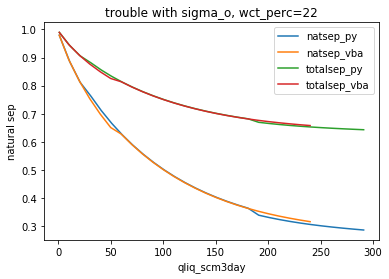

In [16]:
plt.plot(result[0],result[1],label='natsep_py')
plt.plot(data['Q'],data['Естественная сепарация 100 мм'],label='natsep_vba')
plt.plot(result[0],result[2],label='totalsep_py')
plt.plot(data['Q'],data['Общая сепарация'],label='totalsep_vba')
plt.ylabel('natural sep')
plt.xlabel('qliq_scm3day')
plt.title('trouble with sigma_o, wct_perc=22')
plt.legend()
plt.show()